In [3]:
library('tidyverse')

Warning message:
“package ‘tidyverse’ was built under R version 3.4.4”── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
Warning message:
“package ‘ggplot2’ was built under R version 3.4.4”Warning message:
“package ‘tibble’ was built under R version 3.4.4”Warning message:
“package ‘tidyr’ was built under R version 3.4.4”Warning message:
“package ‘readr’ was built under R version 3.4.4”Warning message:
“package ‘purrr’ was built under R version 3.4.4”Warning message:
“package ‘dplyr’ was built under R version 3.4.4”Warning message:
“package ‘stringr’ was built under R version 3.4.4”Warning message:
“package ‘forcats’ was built under R version 3.4.4”── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [4]:
#--- loading data

modularity <-  read.csv('/home/finc/Dropbox/Projects/LearningBrain/data/neuroimaging/modularity_data6.csv')
training_beh <- read.csv("/home/finc/Dropbox/Projects/LearningBrain/data/behavioral/LB_training_summary.csv")
multilayer <- read.csv("/home/finc/Dropbox/Projects/LearningBrain/data/LB_multilayer_measures_method1.csv")

fmri_beh <- read.csv("/home/finc/Dropbox/Projects/LearningBrain/data/behavioral/LB_fmri_behaviour_tidy.csv")
names(fmri_beh)[3] <- 'cond'
names(fmri_beh)[2] <- 'ses'

fmri_beh$cond <- factor(fmri_beh$cond, labels = c('1-back', '2-back'))
fmri_beh$ses <- factor(fmri_beh$ses, labels = c('ses-1', 'ses-2', 'ses-3', 'ses-4'))

fmri_beh_slope <- read.csv("/home/finc/Dropbox/Projects/LearningBrain/data/behavioral/LB_fmri_beh_slope.csv")

dualnback_exclude = c('sub-13', 'sub-21', 'sub-23', 'sub-50')

In [20]:
head(fmri_beh)

sub,ses,cond,modality,prt,dprime,accuracy,sex,group
sub-01,ses-1,1-back,audio,1.183970,4.040271,90.23333,Female,Control
sub-01,ses-1,2-back,audio,1.166353,3.475674,82.25000,Female,Control
sub-01,ses-2,1-back,audio,1.081003,4.137920,88.25000,Female,Control
sub-01,ses-2,2-back,audio,1.202080,3.409597,81.25000,Female,Control
sub-01,ses-3,1-back,audio,1.147463,3.202374,86.23333,Female,Control
sub-01,ses-3,2-back,audio,1.197620,3.535203,86.24167,Female,Control


In [5]:
# 1-back performance only (mean audio and spatial)
p1 <- fmri_beh %>% 
    group_by(sub, group, ses) %>% 
    filter(cond == '1-back') %>% 
    summarize (prt = mean(prt), accuracy = mean(accuracy), dprime = mean(dprime))

# 2-back performance only (mean audio and spatial)
p2 <- fmri_beh %>% 
    group_by(sub, group, ses) %>% 
    filter(cond == '2-back') %>% 

    summarize (prt = mean(prt), accuracy = mean(accuracy), dprime = mean(dprime))

# subtracting 1-back from 2-back
p3 <- p2[, 4:6] - p1[, 4:6]

fmri_beh_all <- fmri_beh %>% 
    group_by(sub, group, ses, cond) %>% summarize (prt = mean(prt), accuracy = mean(accuracy), dprime = mean(dprime))

# mearging with sub, session, group columns
fmri_beh_diff <- data.frame(p1[, 1:3], p3[,1:3])
head(fmri_beh_diff)


Warning message:
“package ‘bindrcpp’ was built under R version 3.4.4”

sub,group,ses,prt,accuracy,dprime
sub-01,Control,ses-1,0.27395000,-6.5041667,-0.9752465
sub-01,Control,ses-2,0.20018500,-3.4916667,-0.2444075
sub-01,Control,ses-3,-0.10792000,0.5166667,0.4769989
sub-01,Control,ses-4,0.05593833,1.0166667,0.5221036
sub-02,Control,ses-1,0.40573500,-0.5708333,-1.3978264
sub-02,Control,ses-2,0.07909500,-0.5041667,-0.3420490


In [181]:
beh_mod <- left_join(fmri_beh_all, modularity, by = c('sub', 'ses', 'cond', 'group'))

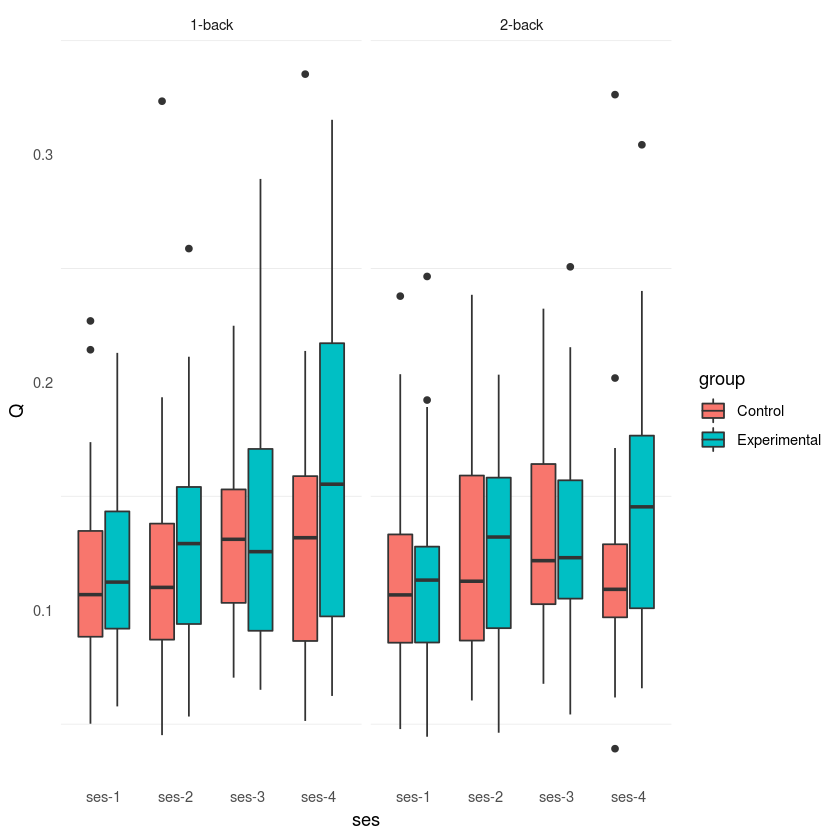

In [196]:
beh_mod %>% filter(!(sub %in% dualnback_exclude)) %>% ggplot(aes(ses, Q, fill = group)) +  geom_boxplot() + facet_wrap(~cond) + theme_minimal() + theme(panel.grid.major = element_blank())

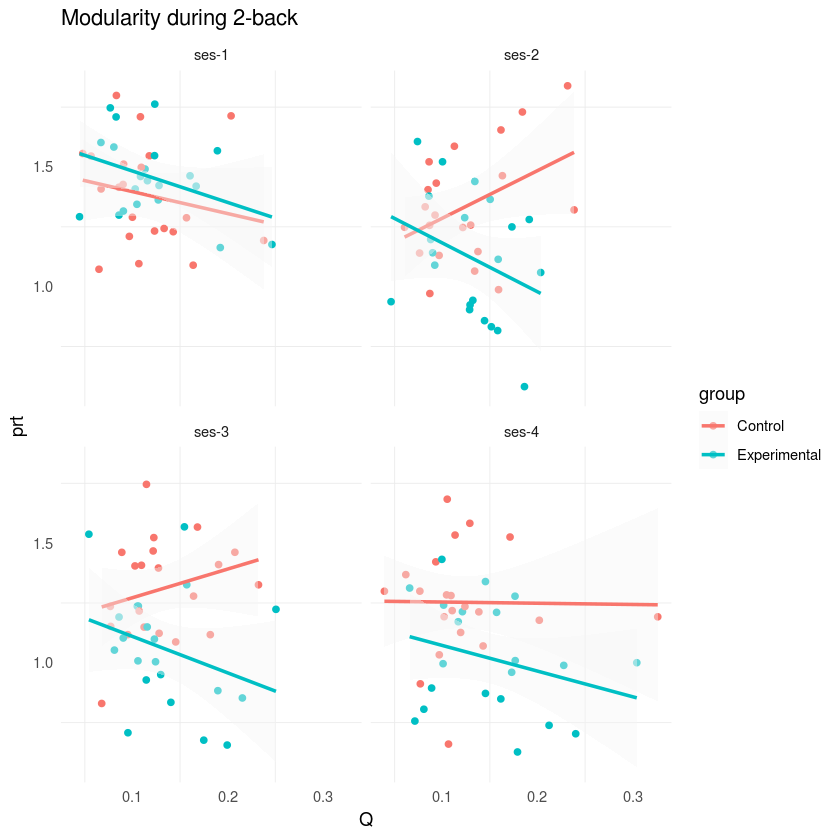

In [211]:
beh_mod %>% 
    filter(!(sub %in% dualnback_exclude)) %>% 
    #filter(ses == 'ses-3') %>% 
    filter(cond == '2-back') %>%
    ggplot(aes(Q, prt)) + geom_point(aes(col = group)) + geom_smooth(method = 'lm', aes(col = group), fill = 'whitesmoke') + facet_wrap(~ses) + 
    theme_minimal() + theme(panel.grid.major = element_blank())+ ggtitle("Modularity during 2-back")


In [209]:
x <- beh_mod %>% 
    filter(!(sub %in% dualnback_exclude)) %>% 
    filter(group == 'Experimental') %>% 
    filter(cond == '2-back') %>% filter(ses == 'ses-2')

In [210]:
cor.test(x$Q, x$prt)


	Pearson's product-moment correlation

data:  x$Q and x$prt
t = -1.4852, df = 19, p-value = 0.1539
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.6620350  0.1268215
sample estimates:
       cor 
-0.3225225 


In [213]:
# 1-back performance only (mean audio and spatial)
m1 <- modularity %>% 
    group_by(sub, group, ses) %>% 
    filter(cond == '1-back')

# 2-back performance only (mean audio and spatial)
m2 <- modularity %>% 
    group_by(sub, group, ses) %>% 
    filter(cond == '2-back')


# subtracting 1-back from 2-back
m3 <- m2[, 1] - m1[,1]
names(m3) <- 'Q_diff'


In [214]:
modu_diff <-  data.frame(m1[,7:8],m3[1])

In [215]:
total_diff <- left_join(fmri_beh_diff, modu_diff, by = c('sub', 'ses')) 

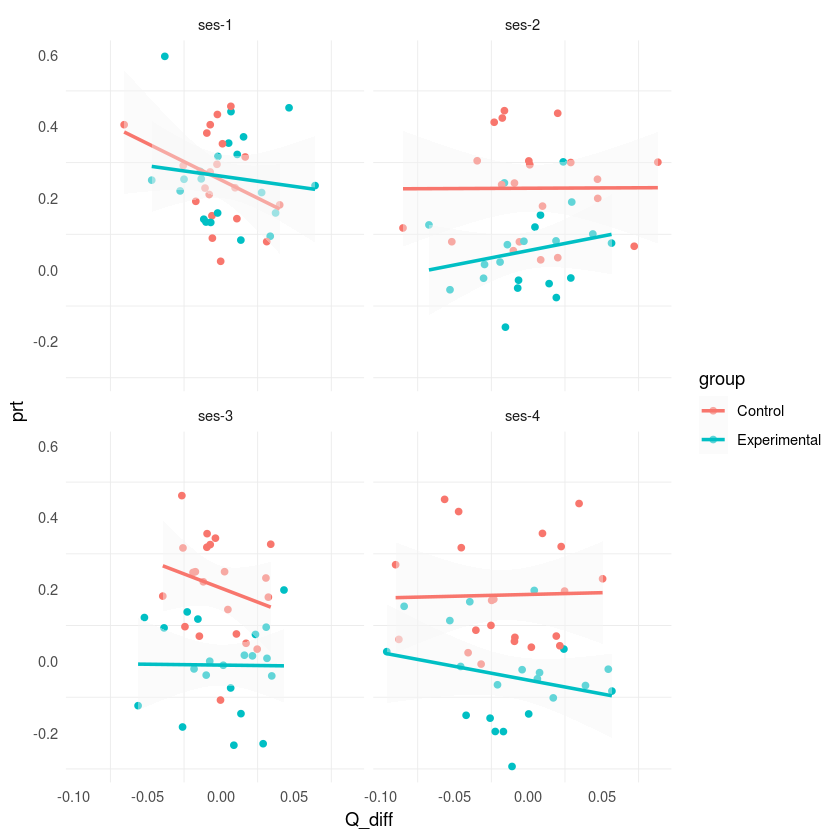

In [244]:
total_diff %>%
    filter(!(sub %in% dualnback_exclude)) %>% 
    ggplot(aes(Q_diff, prt)) + geom_point(aes(col = group)) + 
        geom_smooth(aes(group = group, col = group), fill = 'whitesmoke', method = 'lm') + 
        facet_wrap(~ses)+
        #theme_minimal(base_size = 11)
    theme_minimal() + theme(panel.grid.major = element_blank())


In [219]:
ses1 <- total_diff %>% filter(!(sub %in% dualnback_exclude)) %>% filter(ses == 'ses-1')

In [220]:
cor.test(ses1$prt, ses1$Q_diff)


	Pearson's product-moment correlation

data:  ses1$prt and ses1$Q_diff
t = -1.3731, df = 40, p-value = 0.1774
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.48483075  0.09809407
sample estimates:
       cor 
-0.2121627 


In [247]:
training_progress <- left_join(training_beh, beh_mod)

Joining, by = "sub"
Warning message:
“Column `sub` joining factors with different levels, coercing to character vector”

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'flexibility' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(capture.output(print(obj)), collapse = "\n")
10. capture.output(print(obj))
11. evalVis(expr)
12. withVisible(eval(expr, pf))
13. eval(expr, pf)
14. eval(expr, pf)
15. print(obj)
16. print.ggplot(obj)
17. ggplot_build(x)
18. ggplot_build.ggplot(x)
19. 

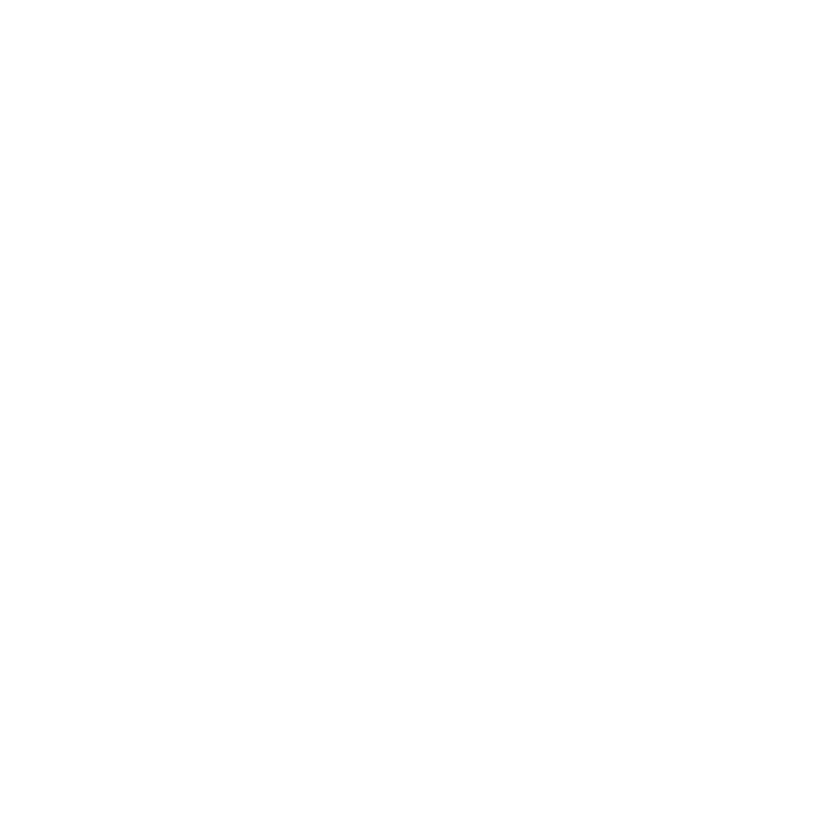

In [256]:
training_progress %>%
    filter(!(sub %in% dualnback_exclude)) %>%
    ggplot(aes(nback_mean_estimate, flexibility)) + geom_point(col = 'black') + 
        geom_smooth(fill = 'whitesmoke', method = 'lm') + 
        facet_wrap(~ses) +
        #theme_minimal(base_size = 11)
        theme_minimal() + theme(panel.grid.major = element_blank()) + 
        ylab("Training progress")


In [290]:
training_progress <- left_join(training_beh, multilayer)

Joining, by = "sub"
Warning message:
“Column `sub` joining factors with different levels, coercing to character vector”

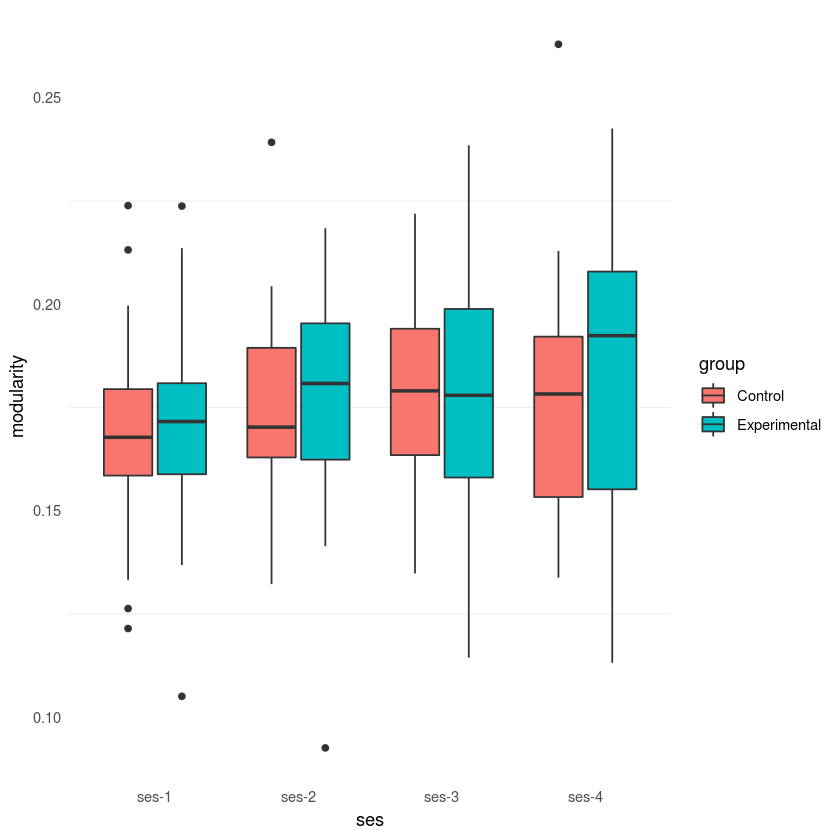

In [6]:
multilayer %>%
    filter(!(sub %in% dualnback_exclude)) %>% 
    #filter(flexibility > 0.5) %>%
    ggplot(aes(ses, modularity, fill = group)) + geom_boxplot() + 
        theme_minimal() + theme(panel.grid.major = element_blank())


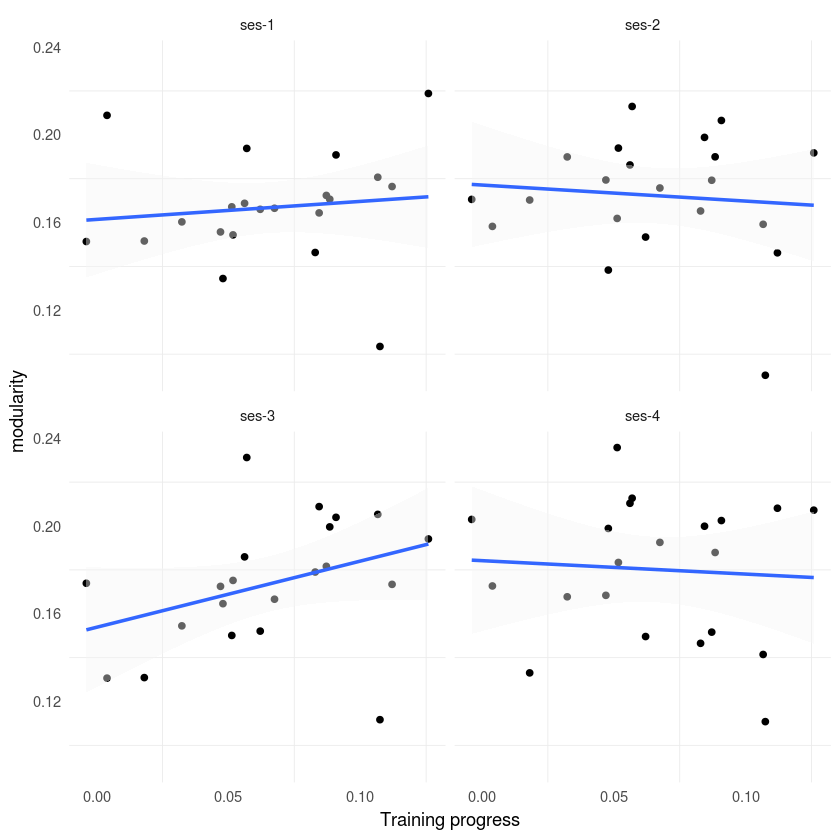

In [287]:
training_progress %>%
    filter(!(sub %in% dualnback_exclude)) %>%
    #filter(flexibility > 0.5) %>%
    ggplot(aes(nback_mean_estimate, modularity)) + geom_point(col = 'black') + 
        geom_smooth(fill = 'whitesmoke', method = 'lm') + 
        facet_wrap(~ses) +
        #theme_minimal(base_size = 11)
        theme_minimal() + theme(panel.grid.major = element_blank()) + 
        xlab("Training progress")


In [234]:
head(training_progress)

sub,nback_mean_estimate,nback_max_estimate,nback_baseline,nback_max_level,group,no,ses,modularity,flexibility
sub-05,0.08441692,0.1186791,2.05,6,Experimental,4,ses-1,0.1689090,0.6084530
sub-05,0.08441692,0.1186791,2.05,6,Experimental,4,ses-2,0.2024497,0.6660686
sub-05,0.08441692,0.1186791,2.05,6,Experimental,4,ses-3,0.2143913,0.6877990
sub-05,0.08441692,0.1186791,2.05,6,Experimental,4,ses-4,0.2054830,0.7167065
sub-06,0.10665635,0.1692466,2.10,7,Experimental,5,ses-1,0.1861898,0.6816188
sub-06,0.10665635,0.1692466,2.10,7,Experimental,5,ses-2,0.1623821,0.6371611


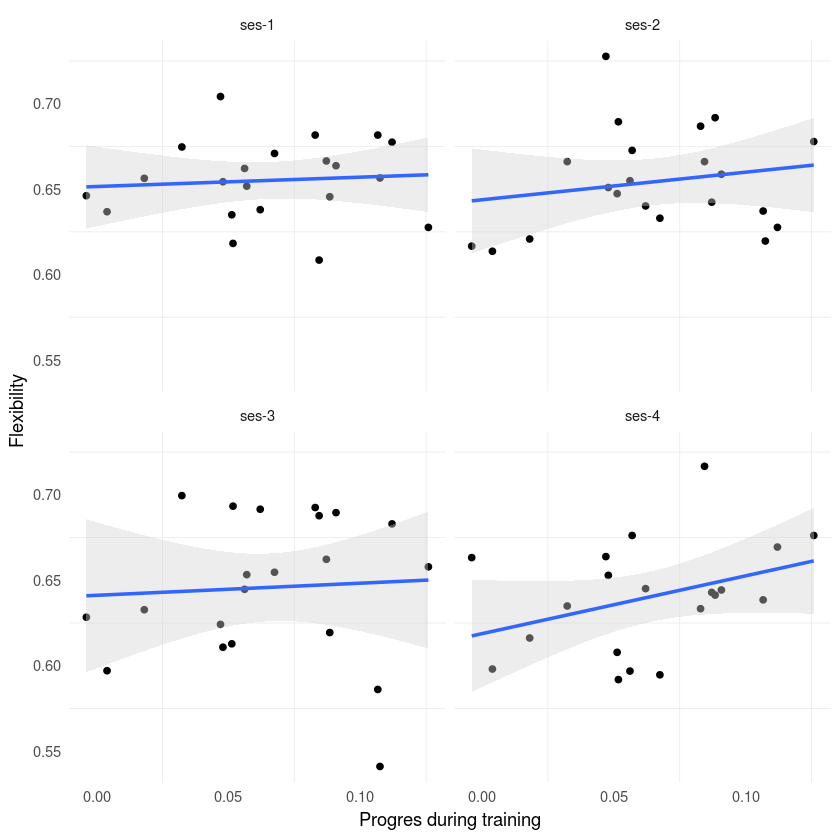

In [243]:
training_progress %>%
    filter(!(sub %in% dualnback_exclude)) %>% 
    filter(flexibility > 0.5) %>%
    ggplot(aes(nback_mean_estimate, flexibility)) + geom_point() + 
        geom_smooth(fill = 'lightgray', method = 'lm') + 
        facet_wrap(~ses)+
        #theme_minimal(base_size = 11)
        theme_minimal() + theme(panel.grid.major = element_blank()) + 
        xlab("Progres during training") + 
        ylab("Flexibility")


In [236]:
y <- training_progress %>%
    filter(!(sub %in% dualnback_exclude)) %>% 
    filter(flexibility > 0.5) %>%
    filter(ses == 'ses-4')

In [237]:
cor.test(y$nback_mean_estimate, y$flexibility)


	Pearson's product-moment correlation

data:  y$nback_mean_estimate and y$flexibility
t = 1.6305, df = 18, p-value = 0.1204
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.09959187  0.69148669
sample estimates:
      cor 
0.3587391 
